<a href="https://colab.research.google.com/github/obengdouglas/UTD-BUAN6341_AppliedML/blob/main/BUAN_6341_501_ML_Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3: Decision Tree Classification

<h3>University of Texas at Dallas - MS Business Analytics </h3>
<h3>BUAN 6341.501: Applied Machine Learning - S23 </h3>
<h3>By: Douglas Obeng</h3>

.

Notebook submitted for Assignment 3 of the Applied Machine Learning Course at The University of Texas at Dallas, Spring 2023

In this project, a Decision Tree model is used to predict whether a person will attend a comedy show based on age, experience, rank and nationality.

# Assignment Specifics

In this assignment, you will use what you have learned to make a "Decision Tree". A Decision Tree is a Flow Chart and can help you make decisions based on previous experience.
In the example, a person will try to decide if he/she should go to a comedy show or not.
Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.


#Data

The data for this assignment was provided as text. This has been put into an excel csv file.

The data has been saved in my github repository for direct online access within this notebook: [DO Github - complete iris dataset](https://github.com/obengdouglas/UTD-BUAN6341_AppliedML/blob/main/Assignment1-Building_a_test_model/IRIS.csv).

The data has 5 columns made up of 4 independent or feature variables and 1 outcome or dependent variable. The 4 independent features are Age, Experience, Rank and Nationality. The dependent variable (outcome) is Go. 

#Step 0 – Import necessary python libraries and packages.###

In [105]:
#import libraries and packages
import pandas as pd # data processing
from sklearn import tree #ML package
from sklearn.tree import DecisionTreeClassifier #decision tree models

#Step 1 – Read the data set using Pandas.

In [106]:
#load read dataset. I have saved the dataset in a csv file saved in my public github for online access
decision = pd.read_csv("https://raw.githubusercontent.com/obengdouglas/UTD-BUAN6341_AppliedML/main/Assignment-3_DecisionTrees/DecisionTree_hw3.csv") #or replace with local dataset location


In [107]:
#View first 5 lines of data
decision.head(5)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [108]:
#Summary description of numerical variables
decision.describe()

,Age,Experience,Rank
count,13.000000,13.000000,13.000000
mean,39.615385,8.846154,6.846154
std,13.263600,5.727800,1.908147
min,18.000000,3.000000,4.000000
25%,35.000000,4.000000,5.000000
50%,42.000000,9.000000,7.000000
75%,45.000000,13.000000,9.000000
max,66.000000,21.000000,9.000000


In [109]:
#Get information on column data types
#Age, Experience and Rank are integers whilst Nationality and Go are objects
decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          13 non-null     int64 
 1   Experience   13 non-null     int64 
 2   Rank         13 non-null     int64 
 3   Nationality  13 non-null     object
 4   Go           13 non-null     object
dtypes: int64(3), object(2)
memory usage: 648.0+ bytes


#Step 2 – Convert Non-Numerical Data into Numerical data.

Decision Trees work with only numerical variables. From the description above, our data has 2 non-numerical variables, Nationality and Go. In order to use them, we have to convert them into numerical variables. 

Nationality is nominal data; therefore we convert to numerical by creating dummy variables (0,1) for each unique value of Nationality. We can use the get_dummies method of one-hot encoder for this. The Nationality column is converted to 3 distinct columns with 0/1 dummies for N, UK and USA. 

For Go, we will convert Yes and No to 1 and 0 respectively. To do this, we first have to convert the datatype from object to category. Also, because Go is the target variable, we do not need to use one-hot encoder. We can simple use label encoding (0, 1, 2, 3,...). It is possible to use Go without converting to numerical but I prefer to convert. 

In [110]:
#Converting categorical variables to numerical using get_dummies (one-hot encoding)
decision_num = pd.get_dummies(decision, columns=["Nationality"]) # using get_dummies method of one-hot encoder

decision_num["Go"] = decision_num["Go"].astype('category') #convert Go from object to category
decision_num["Go"] = decision_num["Go"].cat.codes #convert Go values to numericals

decision_num

,Age,Experience,Rank,Go,Nationality_N,Nationality_UK,Nationality_USA
0,36,10,9,0,0,1,0
1,42,12,4,0,0,0,1
2,23,4,6,0,1,0,0
3,52,4,4,0,0,0,1
4,43,21,8,1,0,0,1
5,44,14,5,0,0,1,0
6,66,3,7,1,1,0,0
7,35,14,9,1,0,1,0
8,52,13,7,1,1,0,0
9,35,5,9,1,1,0,0


#Step 3 - Separate the feature columns from the target column.

In [111]:
#Specify dependent and independent variables. In our data, Go is dependent variable whilst 
#the remaining variables are independent
features = ["Age", "Experience", "Rank", "Nationality_N", "Nationality_UK", "Nationality_USA"] #One of the Nationality dummies can be ommitted without affecting the solution
X = decision_num[features]
y = decision_num["Go"]

#Step 4 - Create and display a Decision Tree

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 100.0%\nvalue = [0.462, 0.538]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 38.5%\nvalue = [1.0, 0.0]'),
 Text(0.42857142857142855, 0.7, 'Nationality_UK <= 0.5\ngini = 0.219\nsamples = 61.5%\nvalue = [0.125, 0.875]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 30.8%\nvalue = [0.0, 1.0]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 30.8%\nvalue = [0.25, 0.75]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 15.4%\nvalue = [0.0, 1.0]'),
 Text(0.7142857142857143, 0.3, 'Age <= 40.5\ngini = 0.5\nsamples = 15.4%\nvalue = [0.5, 0.5]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 7.7%\nvalue = [1.0, 0.0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 7.7%\nvalue = [0.0, 1.0]')]

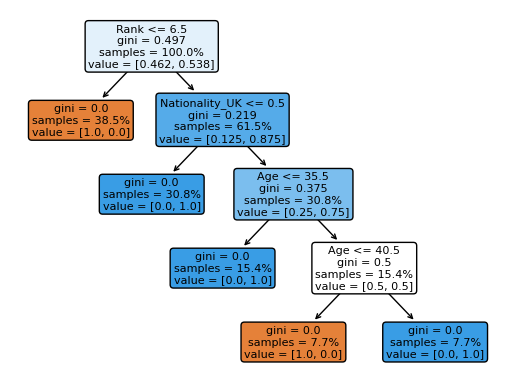

In [112]:
#Create Decision Tree model. All required packages already imported in step 0.
decisiontree = DecisionTreeClassifier(random_state=35)
decisiontree = decisiontree.fit(X.values, y)

tree.plot_tree(decisiontree, feature_names=features,  filled=True, proportion=True, rounded=True, precision=3, fontsize=8)

#Initial runs of the algorithm yielded different answers for every run. This is because the random_state argument was the default (None)
#This meant that the algorithm used a random seed for each run hence the different answers. In order to keep my answer repeatable,
#I have set my random_state to a seed of 35.

#Step 5 – Research and Find out what the Gini Method for Splitting tree is. Explain

From the plot above, it can be seen that every split has a Gini (better known as Gini Index or Gini Impurity)

This Gini Index is a measure of the probability that a randomly selected feature will be classified incorrectly.

It is calculated by subtracting the sum of the squared probabilities of each class from one.

GI = 1 - [sum(probability squared)]

It ranges between 0 and 1, where 0 represents purity of the classification and 1 denotes complete random distribution of elements among various classes. A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.

Reference: https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/

#Step 6. RUN THIS COMMAND - print(dtree.predict([[40, 10, 7, 1]]))

In [113]:
#Run command
print(decisiontree.predict([[40, 10, 7, 0, 0, 1]]))

[1]


#Step 7. RUN THIS COMMAND  print(dtree.predict([[40, 10, 6, 1]]))

In [114]:
#Run command
print(decisiontree.predict([[40, 10, 6, 0, 0, 1]]))

[0]


#Explain Step 6 and Step 7

Explanation for step 6: The model predicted a result of 1 implyng that given a person of Age = 40, Experience of 10, Rank of 7 and Nationality of USA, that person is PREDICTED TO GO to the comedy show (1)


Explanation for step 7: The model predicted a result of 0 implyng that given a person of Age = 40, Experience of 10, Rank of 6 and Nationality of USA, that person is PREDICTED NOT TO GO to the comedy show (1)